Импортируем библиотеки

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

Читаем датасет из csv файла и отбрасываем NaN значения

In [37]:
df = pd.read_csv('flights_NY.csv').dropna(axis=0)

Смотрим 5 верхних строк датасета

In [38]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [39]:
df.shape

(327346, 14)

## Задание 1

По каждой авиакомпании оцените вероятность того, что задержка прилета будет положительной и нарисуйте график, показывающий распределение этой вероятности по авиакомпаниям.

Оцениваем вероятность путём деления количества задержанных рейсов на общее количество выполненных рейсов для каждой авиакомпании.

In [40]:
positive_delays = df[df['arr_delay'] > 0].groupby('carrier')['arr_delay'].count()
total_flights = df.groupby('carrier')['arr_delay'].count()
probability_of_delay = positive_delays / total_flights
probability_of_delay

carrier
9E    0.383775
AA    0.335118
AS    0.266573
B6    0.436807
DL    0.344391
EV    0.479064
F9    0.575624
FL    0.596850
HA    0.283626
MQ    0.467029
OO    0.344828
UA    0.384583
US    0.370581
VX    0.341282
WN    0.440385
YV    0.474265
Name: arr_delay, dtype: float64

Выводим вероятность в виде столбчатой диаграммы (barplot)

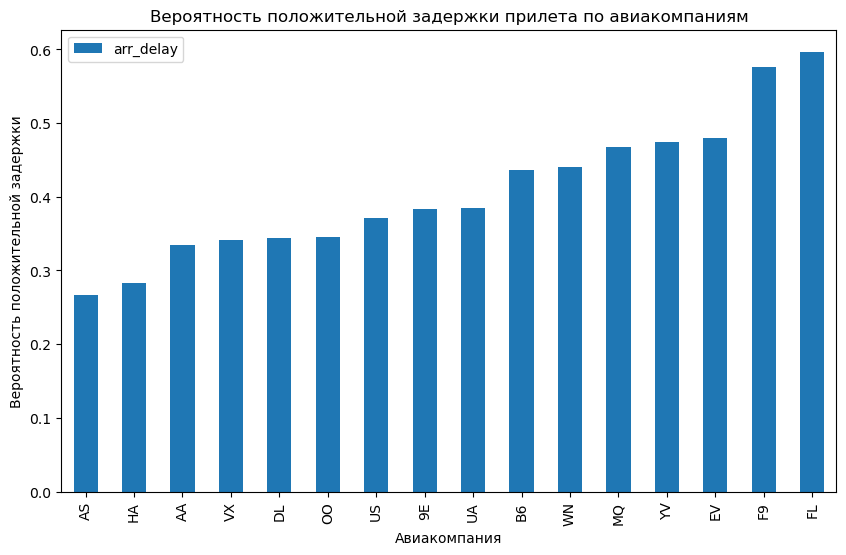

In [41]:
plt.figure(figsize=(10, 6))
probability_of_delay.sort_values().plot(kind='bar')
plt.title('Вероятность положительной задержки прилета по авиакомпаниям')
plt.xlabel('Авиакомпания')
plt.ylabel('Вероятность положительной задержки')
plt.legend()
plt.show()

## Задание 2

Постройте гистограмму расстояния перелета distance. Выделите на ней три группы перелетов: короткие, средние и длинные. Какие значения distance разумно выбрать в качестве границы, разделяющей короткие. средние и длинные перелеты? Куда летят самолеты в группе длинных перелетов? Найдите среднее время задержки вылета в каждой из трех выделенных групп.

Построим гистограмму расстояний перелёта

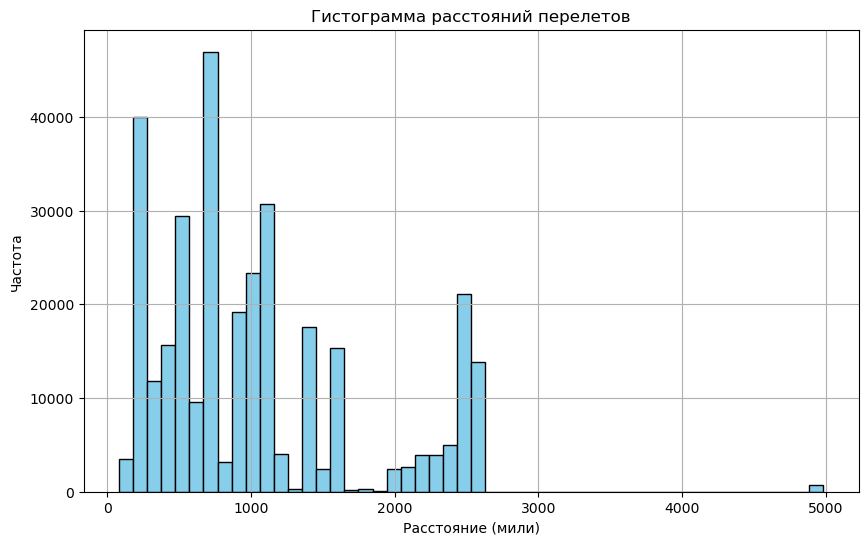

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Гистограмма расстояний перелетов')
plt.xlabel('Расстояние (мили)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Возможные границы для разделения:

Короткие перелеты: от 0 до 1000 миль.
Этот диапазон охватывает первый пик и низину после него. Здесь наблюдается наибольшая плотность перелетов.

Средние перелеты: от 1000 до 2000 миль.
Этот диапазон покрывает следующий значимый пик и низину перед более длинными перелетами.

Длинные перелеты: от 2000 миль и выше.
Этот диапазон включает все оставшиеся расстояния, где плотность меньше, но все еще значима для более длинных перелетов.

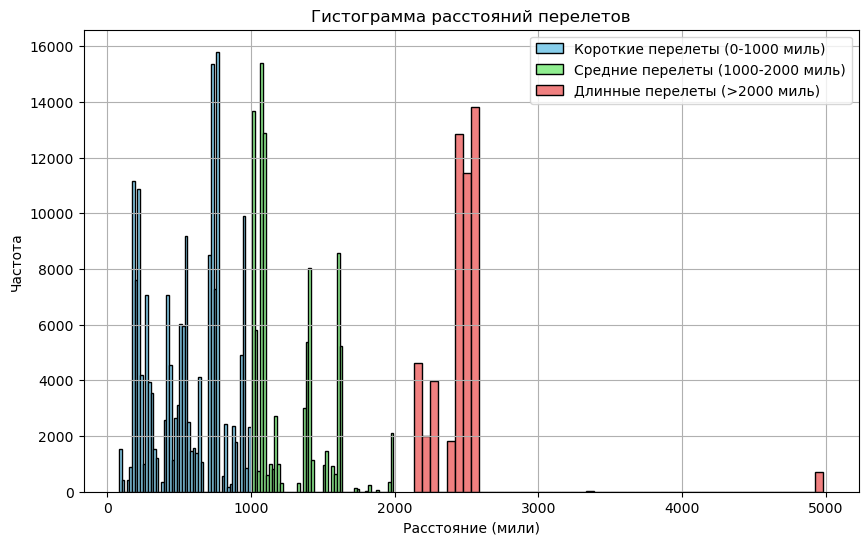

In [43]:
short_distance_max = 1000
medium_distance_max = 2000

plt.figure(figsize=(10, 6))

plt.hist(df[df['distance'] <= short_distance_max]['distance'], bins=50, color='skyblue', edgecolor='black', label='Короткие перелеты (0-1000 миль)')
plt.hist(df[(df['distance'] > short_distance_max) & (df['distance'] <= medium_distance_max)]['distance'], bins=50, color='lightgreen', edgecolor='black', label='Средние перелеты (1000-2000 миль)')
plt.hist(df[df['distance'] > medium_distance_max]['distance'], bins=50, color='lightcoral', edgecolor='black', label='Длинные перелеты (>2000 миль)')

plt.title('Гистограмма расстояний перелетов')
plt.xlabel('Расстояние (мили)')
plt.ylabel('Частота')

plt.legend()

plt.grid(True)

plt.show()

In [44]:
long_flights = df[df['distance'] > medium_distance_max]

long_destinations = long_flights['dest'].unique()

print("Места назначения для длинных перелетов:")
print(long_destinations)

Места назначения для длинных перелетов:
['LAX' 'SFO' 'LAS' 'PHX' 'SNA' 'SEA' 'SAN' 'HNL' 'LGB' 'BUR' 'PDX' 'SJC'
 'OAK' 'SMF' 'PSP' 'ANC']


In [45]:
short_flights = df[df['distance'] <= short_distance_max]
medium_flights = df[(df['distance'] > short_distance_max) & (df['distance'] <= medium_distance_max)]
long_flights = df[df['distance'] > medium_distance_max]

short_flights_delay_mean = short_flights['dep_delay'].mean()
medium_flights_delay_mean = medium_flights['dep_delay'].mean()
long_flights_delay_mean = long_flights['dep_delay'].mean()

print("Среднее время задержки вылета для коротких перелетов:", short_flights_delay_mean)
print("Среднее время задержки вылета для средних перелетов:", medium_flights_delay_mean)
print("Среднее время задержки вылета для длинных перелетов:", long_flights_delay_mean)

Среднее время задержки вылета для коротких перелетов: 13.42923644807606
Среднее время задержки вылета для средних перелетов: 11.825531687506679
Среднее время задержки вылета для длинных перелетов: 10.770720175061545


## Задание 3

Нарисуйте график среднего времени задержки вылета по месяцам и отметьте на нем границы доверительных интервалов с уровнем доверия 0.95. С помощью подходящего статистического теста проверьте, можно ли принять гипотезу о равенстве средних в январе и феврале на уровне значимости 0.05? на уровне значимости 0.01? 

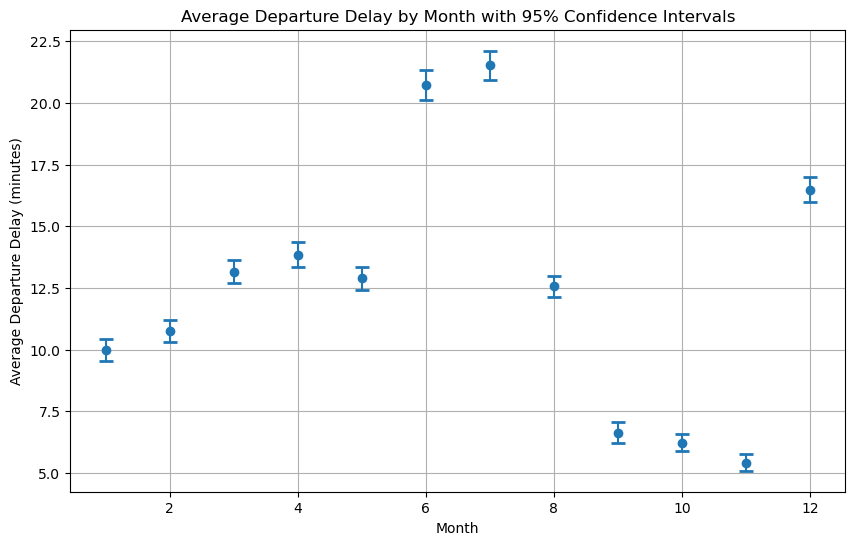

In [46]:
monthly_avg_delay = df.groupby('month')['dep_delay'].mean()
monthly_std_delay = df.groupby('month')['dep_delay'].std()
monthly_count = df.groupby('month')['dep_delay'].count()

confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
ci_half_width = z_score * (monthly_std_delay / np.sqrt(monthly_count))

plt.figure(figsize=(10, 6))
plt.errorbar(monthly_avg_delay.index, monthly_avg_delay, yerr=ci_half_width, fmt='o', capsize=5, capthick=2)
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка вылета (минуты)')
plt.title('Средняя задержка вылета по месяцам с доверительным интервалом 95%')
plt.grid(True)
plt.show()

In [47]:
from scipy import stats
import numpy as np

jan_delays = df[df['month'] == 1]['dep_delay'].dropna()
feb_delays = df[df['month'] == 2]['dep_delay'].dropna()

t_stat, p_value = stats.ttest_ind(jan_delays, feb_delays)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

alpha_05 = 0.05
alpha_01 = 0.01

if p_value < alpha_05:
    print("На уровне значимости 0.05: Отвергаем нулевую гипотезу, средние значения задержек различны.")
else:
    print("На уровне значимости 0.05: Не можем отвергнуть нулевую гипотезу, средние значения задержек не различны.")

if p_value < alpha_01:
    print("На уровне значимости 0.01: Отвергаем нулевую гипотезу, средние значения задержек различны.")
else:
    print("На уровне значимости 0.01: Не можем отвергнуть нулевую гипотезу, средние значения задержек не различны.")


t-статистика: -2.386498623322741
p-значение: 0.017013366495100535
На уровне значимости 0.05: Отвергаем нулевую гипотезу, средние значения задержек различны.
На уровне значимости 0.01: Не можем отвергнуть нулевую гипотезу, средние значения задержек не различны.


## Задание 4

Найдите коэффициент корреляции между расстоянием distance и временем полета air_time. Постройте точечную диаграмму в осях distance (х) и air_time (y). Найдите коэффициенты линейной регрессии и нанесите полученную прямую на график. Как можно интерпретировать смысл коэффициентов полученной линейной модели?

In [48]:
from scipy.stats import linregress

distance_air_time = df[['distance', 'air_time']]

correlation_coefficient = distance_air_time.corr().iloc[0, 1]
print(correlation_coefficient)

0.9906496472248685


0.99 - очень сильная корреляция

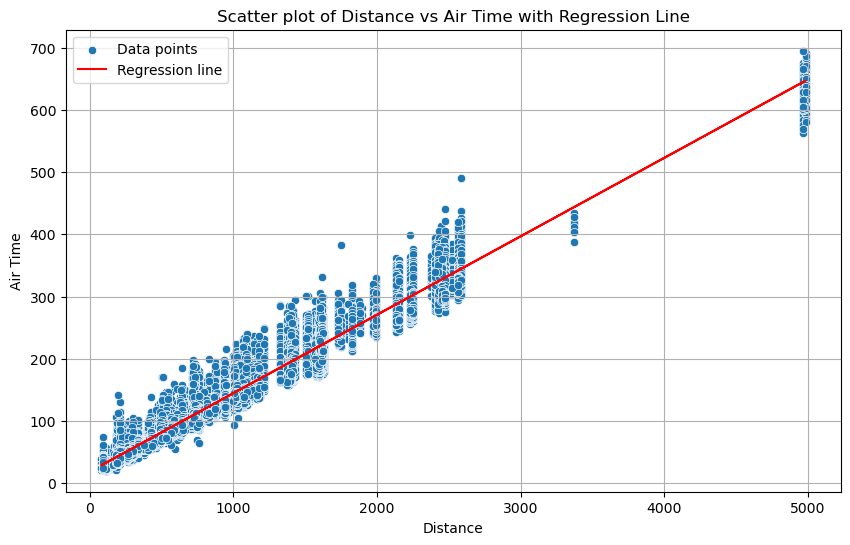

(0.9906496472248685, 0.1261193246738606, 18.466578127760414)

In [49]:
slope, intercept, r_value, p_value, std_err = linregress(distance_air_time['distance'], distance_air_time['air_time'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='air_time', data=distance_air_time, label='Точки с данными')
plt.plot(distance_air_time['distance'], intercept + slope * distance_air_time['distance'], color='red', label='Линейная регрессия')
plt.xlabel('Дистанция')
plt.ylabel('Время полёта')
plt.title('Диаграмма рассеивания (дистанция и время полёта')
plt.legend()
plt.grid(True)
plt.show()

(correlation_coefficient, slope, intercept)

Интерпретация коэффициентов

Наклон (0,126): Это означает, что на каждую дополнительную милю расстояния время в воздухе увеличивается примерно на 0,126 минуты. Это отражает среднее время, необходимое для преодоления одной дополнительной мили.

Перехват (18,47): Здесь представлено расчетное время полета, когда расстояние равно нулю. Хотя нулевое расстояние не имеет практического значения в данном контексте, перехват можно рассматривать как базовое время полета, которое учитывает такие факторы, как взлет, посадка и руление, которые вносят свой вклад в общее время полета независимо от расстояния.

## Задание 5

Постройте нормированную гистограмму распределения задержки прилета по тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании. Сделайте предположение о том, каким распределением может описываться полученная гистограмма, оцените параметры этого распределения и нанесите график плотности на график с гистограммой. Вопрос со звездочкой (необязательный): с помощью подходящего статистического теста проверьте, можно ли принять гипотезу о выбранном распределении?

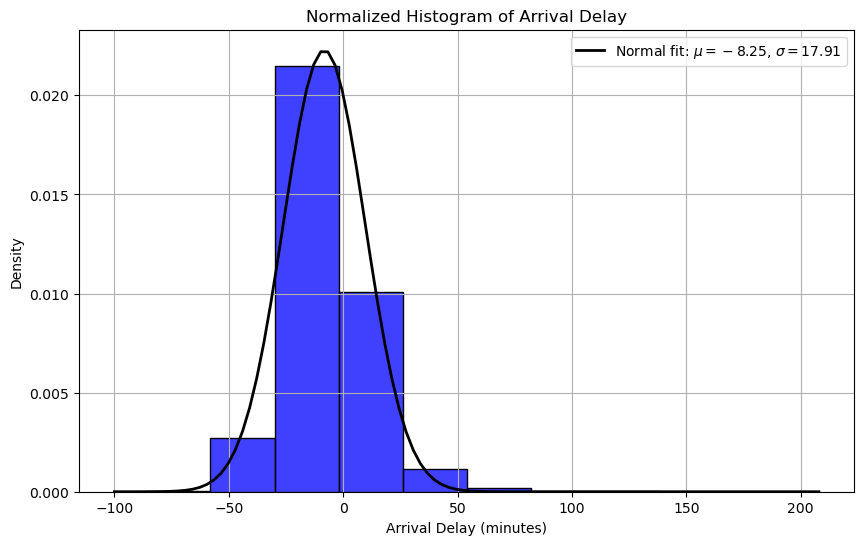

In [50]:
from scipy.stats import norm

filtered_df = df[(df['dep_delay'] >= -15) & (df['dep_delay'] <= 15)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['arr_delay'], kde=False, stat="density", bins=10, color='blue')
plt.xlabel('Задержка прибытия (минуты)')
plt.ylabel('Плотность')
plt.title('Нормализованная гистограмма задержки прибытия')
plt.grid(True)

mu, std = norm.fit(filtered_df['arr_delay'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Нормальное распределение: $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.legend()

plt.show()

## Задание 6

Постройте модель логистической регрессии, которая будет предсказывать, что задержка прилета составит более 15 минут. Какие признаки вы будете использовать? Какие новые признаки, на основе имеющихся, можете предложить? Какова точность полученной модели (precision, recall, accuracy)?

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


df['arr_delay_15'] = (df['arr_delay'] > 15).astype(int)

df['hour'] = (df['dep_time'] // 100).astype(int)
df['is_holiday'] = df.apply(lambda x: 1 if (x['month'] == 1 and x['day'] == 1) else 0, axis=1)

features = ['dep_delay', 'air_time', 'distance', 'carrier', 'origin', 'dest', 'hour', 'is_holiday']
X = df[features]
y = df['arr_delay_15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['dep_delay', 'air_time', 'distance', 'hour']
categorical_features = ['carrier', 'origin', 'dest']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

precision, recall, accuracy


(0.8939582684521956, 0.7345189355168884, 0.9158087673743699)